## Imports

In [1]:
import torch
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
import os
import warnings

warnings.simplefilter("ignore", category=UserWarning)

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(device)

mps


## Environment

In [2]:
env = gym.make("Humanoid-v5", render_mode = "human")

In [3]:
env.reset()

(array([ 1.40280973e+00,  1.00266907e+00, -7.43205710e-03, -6.40687839e-03,
         4.86568847e-03, -1.39696394e-03,  3.81499383e-03, -7.79952538e-03,
         4.80296581e-03, -2.15547290e-03, -5.32713200e-05,  6.94229948e-03,
         3.86628059e-03, -8.81760063e-03,  9.63884180e-03, -2.95463620e-03,
        -9.22359064e-03, -2.26541289e-03,  3.25853707e-03,  5.42486172e-03,
        -4.57446448e-03, -5.04326836e-03,  4.19198127e-03,  7.01533948e-04,
         2.96553944e-03, -2.79640021e-03, -2.08046868e-03,  1.99790633e-03,
        -6.33023205e-03,  7.97904146e-03, -8.06500894e-03,  3.81288520e-03,
         9.08527137e-03, -3.25562228e-03, -4.15005721e-04,  6.24977459e-03,
         9.30436418e-04,  3.80296788e-03, -7.39355201e-03,  9.43088951e-03,
        -6.01089932e-03,  6.21122279e-03, -3.39696888e-03,  4.93769825e-03,
        -6.43743689e-03,  2.29938005e+00,  2.28367537e+00,  4.61410173e-02,
         1.91122114e-03,  9.32152691e-02, -4.09203085e-02, -1.94520686e-01,
         8.0

In [4]:
env.action_space

Box(-0.4, 0.4, (17,), float32)

In [5]:
env.observation_space

Box(-inf, inf, (348,), float64)

In [6]:
env.render()

## Train Model

In [7]:
env = DummyVecEnv([lambda: env])

In [11]:
log_path = os.path.join("Training", "logs")
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log = log_path)

Using cpu device


In [13]:
model.learn(total_timesteps=1000000)

Logging to Training/logs/PPO_3
-----------------------------
| time/              |      |
|    fps             | 37   |
|    iterations      | 1    |
|    time_elapsed    | 54   |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 40          |
|    iterations           | 2           |
|    time_elapsed         | 102         |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.025663123 |
|    clip_fraction        | 0.265       |
|    clip_range           | 0.2         |
|    entropy_loss         | -24.1       |
|    explained_variance   | 0.0262      |
|    learning_rate        | 0.0003      |
|    loss                 | 353         |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0727     |
|    std                  | 1           |
|    value_loss           | 947         |
---

## Save Model

In [14]:
ppo_path = os.path.join("Training", "Saved Models", "PPO_Driving_Model")

In [15]:
model.save(ppo_path)

In [16]:
del model

In [17]:
model = PPO.load(ppo_path, env)

## Test Model

In [18]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

(466.61626143455504, 86.88748301453121)

In [38]:
episodes = 25

ep = []
points = []

for i in range(1, episodes+1):
    obs = env.reset()
    done = False
    score = 0

    while not done:
        env.render()
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        score += reward

        

    ep.append(i)
    points.append(score)
    
    print(f"Episode: {i} Score: {score}")

env.close()

Episode: 1 Score: [404.26865]
Episode: 2 Score: [621.7988]
Episode: 3 Score: [310.491]
Episode: 4 Score: [339.64505]
Episode: 5 Score: [408.06857]
Episode: 6 Score: [532.42773]
Episode: 7 Score: [410.6877]
Episode: 8 Score: [411.03226]
Episode: 9 Score: [507.86993]
Episode: 10 Score: [439.2588]
Episode: 11 Score: [630.3336]
Episode: 12 Score: [416.67834]
Episode: 13 Score: [511.8846]
Episode: 14 Score: [485.579]
Episode: 15 Score: [271.76178]
Episode: 16 Score: [341.03375]
Episode: 17 Score: [440.88358]
Episode: 18 Score: [400.60773]
Episode: 19 Score: [502.7464]
Episode: 20 Score: [548.29407]
Episode: 21 Score: [299.68594]
Episode: 22 Score: [396.3685]
Episode: 23 Score: [369.30356]
Episode: 24 Score: [588.4573]
Episode: 25 Score: [409.53494]


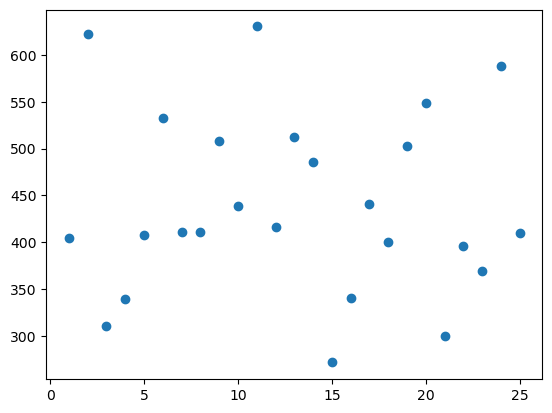

In [39]:
import matplotlib.pyplot as plt

plt.scatter(ep, points)